# Графики параметров усредненных по 5  дискам
(сравнение нескольких измерений системы)

In [1]:
import json
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
configs = []
for i in range(1):
    path = 'packet_configs/fixed_disks_offset/fio_tests_{}.json'.format(i)
    with open(path, 'r') as f:
        config = json.load(f)
    configs.append(config)
SIZES = [int(s[:-1]) for s in config]

In [3]:
def plot_common_params(param, configs):
    plt.figure(figsize=(6,4))
    for i, conf in enumerate(configs):
        mean = [v[param]['mean'] for v in conf.values()]
        plt.plot(SIZES, mean, label='config ' + str(i))
    plt.legend()
    plt.grid()
    plt.xlabel('block size (KB)')
    plt.ylabel('seconds')
    plt.title('Fio results: ' + param)
    plt.legend(loc='upper left')
    plt.show()

In [4]:
def plot_rw_params(rw, param, configs):
    plt.figure(figsize=(6,4))
    for i, conf in enumerate(configs):
        mean = [v[rw][param]['mean'] for v in conf.values()]
        plt.plot(SIZES, mean, label='config ' + str(i))
    plt.legend()
    plt.grid()
    plt.xlabel('block size (KB)')
    plt.ylabel('seconds')
    title = 'Fio results: {} {}'.format(rw, param)
    plt.title(title)
    plt.legend(loc='upper left')
    plt.show()

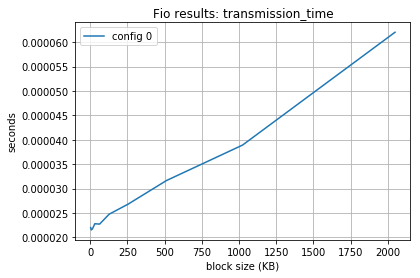

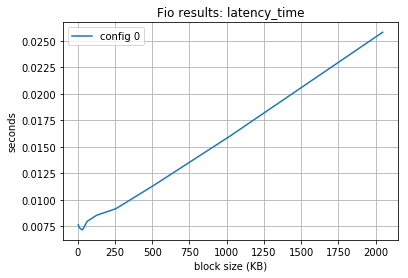

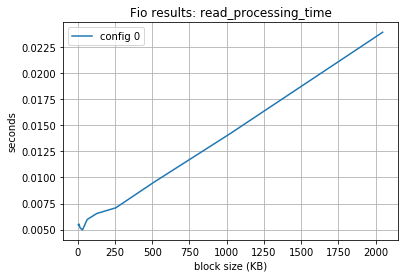

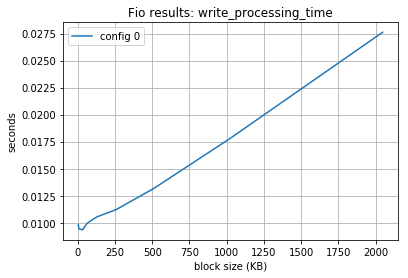

In [5]:
# common parameters

common_params_names = ['transmission_time', 'latency_time', 'read_processing_time', 'write_processing_time']

for param in common_params_names:
    plot_common_params(param, configs)

In [6]:
# read/write parameters
rw_params_names = ['rate_time', 'seek_time', 'overheads_time']

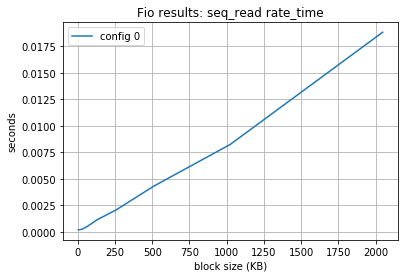

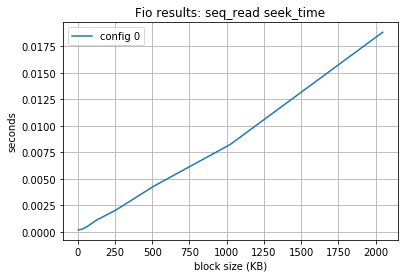

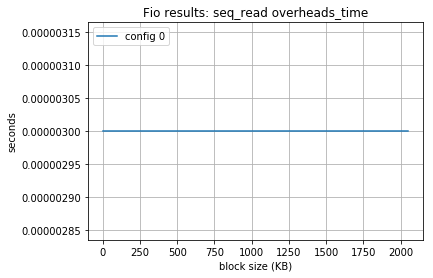

In [7]:
rw = 'seq_read'
for param in rw_params_names:
    plot_rw_params(rw, param, configs)

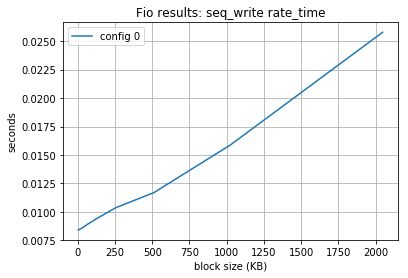

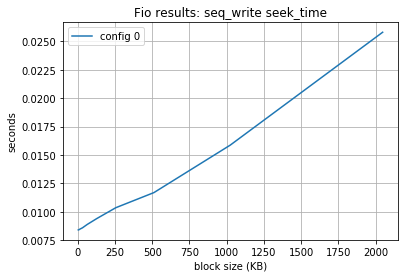

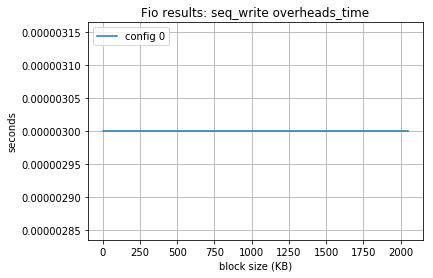

In [8]:
rw = 'seq_write'
for param in rw_params_names:
    plot_rw_params(rw, param, configs)

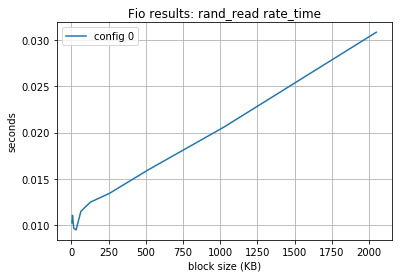

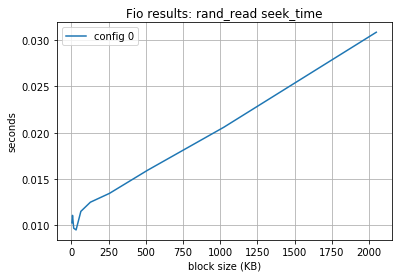

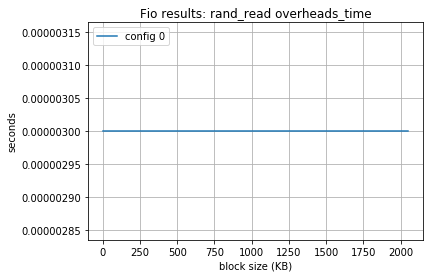

In [9]:
rw = 'rand_read'
for param in rw_params_names:
    plot_rw_params(rw, param, configs)

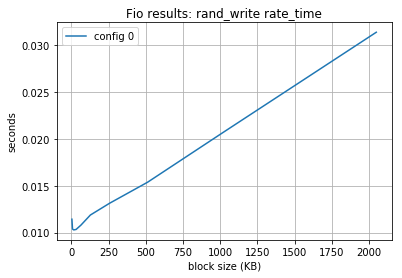

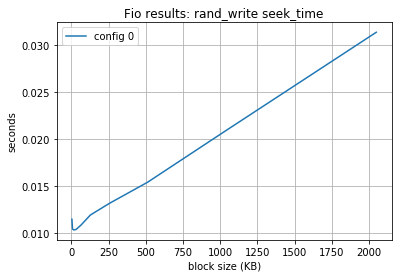

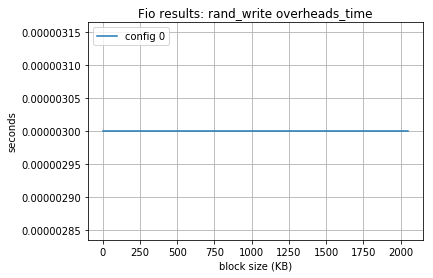

In [10]:
rw = 'rand_write'
for param in rw_params_names:
    plot_rw_params(rw, param, configs)

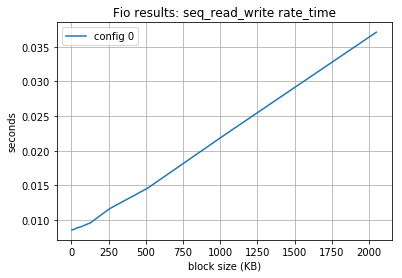

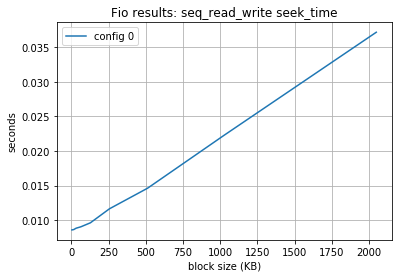

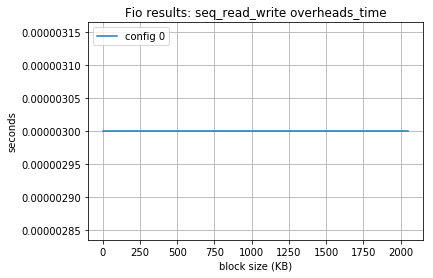

In [11]:
rw = 'seq_read_write'
for param in rw_params_names:
    plot_rw_params(rw, param, configs)

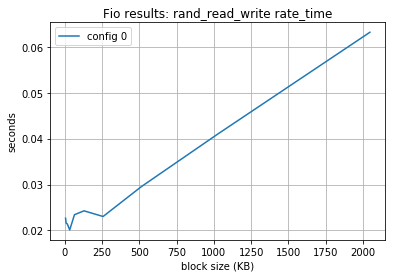

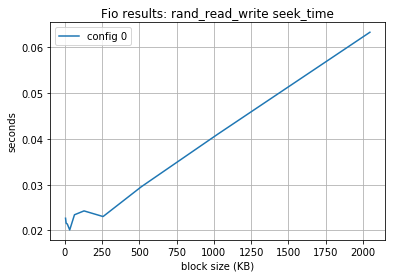

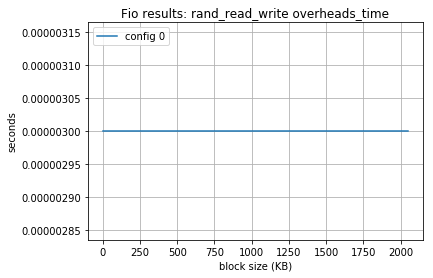

In [12]:
rw = 'rand_read_write'
for param in rw_params_names:
    plot_rw_params(rw, param, configs)